## ПІДСУМКОВА КОНТРОЛЬНА РОБОТА
## МАШИННЕ НАВЧАННЯ
## Авдєєва Серафима ФІТ 4-4
## Завдання 2
Розробити за допомогою бібліотеки
surprise рекомендаційну систему.
Використати датасет movielens 100k

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163485 sha256=c06421700101d77e571fa00373083e1cce0b3926c0da7322cebaf981452d8bf6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import Dataset
from surprise import SVD, SVDpp
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Використати датасет   movielens-100k
data = Dataset.load_builtin(name='ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [5]:
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print(df.head())

  user item  rating  timestamp
0  196  242     3.0  881250949
1  186  302     3.0  891717742
2   22  377     1.0  878887116
3  244   51     2.0  880606923
4  166  346     1.0  886397596


In [6]:
#Використайте алгоритми SVD, SVDpp
svd_alg = SVD()
svdpp_alg = SVDpp()

In [7]:
# Найкращі параметри для алгоритмів підберіть за допомогою крос-валідації.
cv_svd = cross_validate(svd_alg, data, measures=['RMSE'], cv=5, verbose=True)
cv_svdpp = cross_validate(svdpp_alg , data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9304  0.9295  0.9438  0.9384  0.9436  0.9372  0.0062  
Fit time          1.92    1.49    1.48    1.45    1.46    1.56    0.18    
Test time         0.14    0.22    0.21    0.22    0.14    0.19    0.04    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9165  0.9124  0.9178  0.9240  0.9253  0.9192  0.0048  
Fit time          27.27   26.98   27.82   27.18   27.21   27.29   0.28    
Test time         5.68    4.64    4.21    4.87    5.17    4.91    0.49    


In [8]:
# Обчисліть середнє значення середньоквадратичної помилки RMSE
# для кожного алгоритму на основі результатів крос-валідації.
rmse_svd = cv_svd['test_rmse'].mean()
rmse_svdpp = cv_svdpp['test_rmse'].mean()

In [9]:
print(f"SVD: {rmse_svd}")
print(f"SVDpp: {rmse_svdpp}")

SVD: 0.9371538729509215
SVDpp: 0.9192103318657974


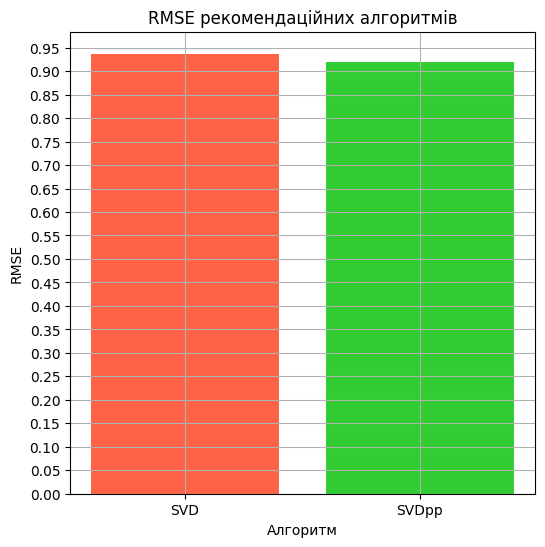

Оптимальний алгоритм: SVDpp
Його значення RMSE: 0.9192103318657974


In [11]:
# Виберіть оптимальний алгоритм
# (Зазвичай, алгоритм з найменшим значенням RMSE
# вважається найкращим для даного завдання рекомендації)
rmse_values = [rmse_svd, rmse_svdpp]
algs = ['SVD', 'SVDpp']

best_alg_index = rmse_values.index(min(rmse_values))
best_alg = algs[best_alg_index]
best_rmse = rmse_values[best_alg_index]

# Зробіть візуалізацію
plt.figure(figsize=(6, 6))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.grid()
plt.bar(algs, rmse_values, color=['tomato' if alg != best_alg else 'limegreen' for alg in algs])
plt.title('RMSE рекомендаційних алгоритмів')
plt.xlabel('Алгоритм')
plt.ylabel('RMSE')
plt.show()

print(f"Оптимальний алгоритм: {best_alg}\nЙого значення RMSE: {best_rmse}")

# Висновок:

У цьому завданні ми розробили рекомендаційну систему з використанням бібліотеки Surprise на основі датасету "movielens-100k". Ми провели крос-валідацію для кількох алгоритмів, а саме SVD та SVD++, з метою вибору найкращого алгоритму для нашої рекомендаційної системи.

Після аналізу результатів крос-валідації ми визначили, що оптимальним алгоритмом для даного завдання є SVDpp, який показав найменше значення середньоквадратичної помилки (RMSE) серед усіх розглянутих алгоритмів. Це свідчить про те, що цей алгоритм надає найкращі рекомендації для користувачів нашої системи на основі доступних даних.

Отже, в результаті виконаної роботи ми успішно розробили та оптимізували рекомендаційну систему, яка здатна надавати користувачам більш точні та персоналізовані рекомендації на основі їхніх попередніх взаємодій з контентом. Це може бути важливим інструментом для підвищення задоволення користувачів та збільшення участі в системі.